# Entry 15 notebook - Categorical Correlation/Collinearity - Mushroom Dataset

Categorical Collinearity using the [Mushroom Dataset](http://archive.ics.uci.edu/ml/datasets/Mushroom) on the UCI Repository.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import category_encoders as ce

In [3]:
col_names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
             'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
             'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
             'stalk_color_above_ring', 'stalk_color_below_ring',
             'veil_type', 'veil_color', 'ring_number', 'ring_type',
             'spore_print_color', 'population', 'habitat']
mushrooms_raw = pd.read_csv('../data/expanded.csv', header=None, names=col_names).dropna()

In [4]:
for col in mushrooms_raw.columns:
    if len(mushrooms_raw[col].unique()) == 1:
        mushrooms_raw.drop(col, axis=1, inplace=True)


mushrooms_y = mushrooms_raw['class'].astype('category').cat.rename_categories({'EDIBLE':1, 'POISONOUS':0})
mushrooms = mushrooms_raw.drop('class', axis=1)
mushrooms.tail()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
8411,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,...,SMOOTH,SMOOTH,ORANGE,ORANGE,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,...,SMOOTH,SMOOTH,ORANGE,ORANGE,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,...,SMOOTH,SMOOTH,ORANGE,ORANGE,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,...,SMOOTH,SMOOTH,ORANGE,ORANGE,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES
8415,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,...,SMOOTH,SMOOTH,ORANGE,ORANGE,BROWN,ONE,PENDANT,BUFF,CLUSTERED,LEAVES


### Pearson and Spearman Correlations after encoding

In [4]:
def viz_corr(df, target, encoder=ce.OrdinalEncoder):
    cat_cols = df.columns.tolist()
    index = df.index.tolist()
    encoder = encoder(cols=cat_cols)
    encd_df = pd.DataFrame(encoder.fit_transform(df[cat_cols], target), index=index)
    for col in encd_df.columns:
        if len(encd_df[col].unique()) == 1:
            encd_df.drop(col, axis=1, inplace=True)
    
    plt.figure(figsize=(20,7))

    plt.subplot(1, 2, 1)
    sns.heatmap(encd_df.corr(method='pearson'), vmin=-1, vmax=1)
    plt.title('Pearson correlations')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(encd_df.corr(method='spearman'), vmin=-1, vmax=1)
    plt.title('Spearman correlations')

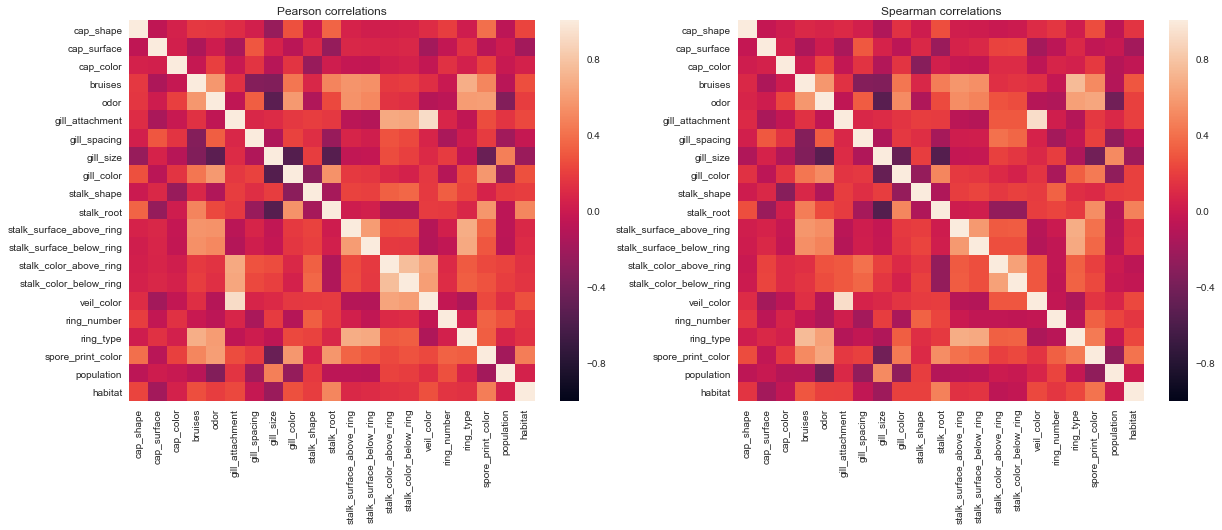

In [5]:
encoder = ce.OrdinalEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

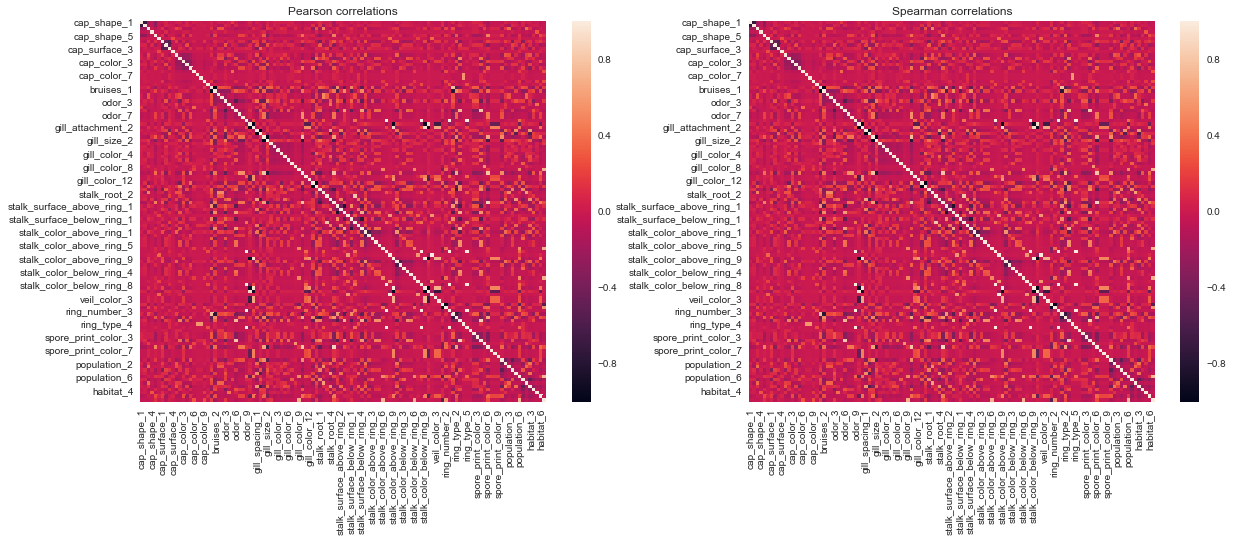

In [6]:
encoder = ce.OneHotEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

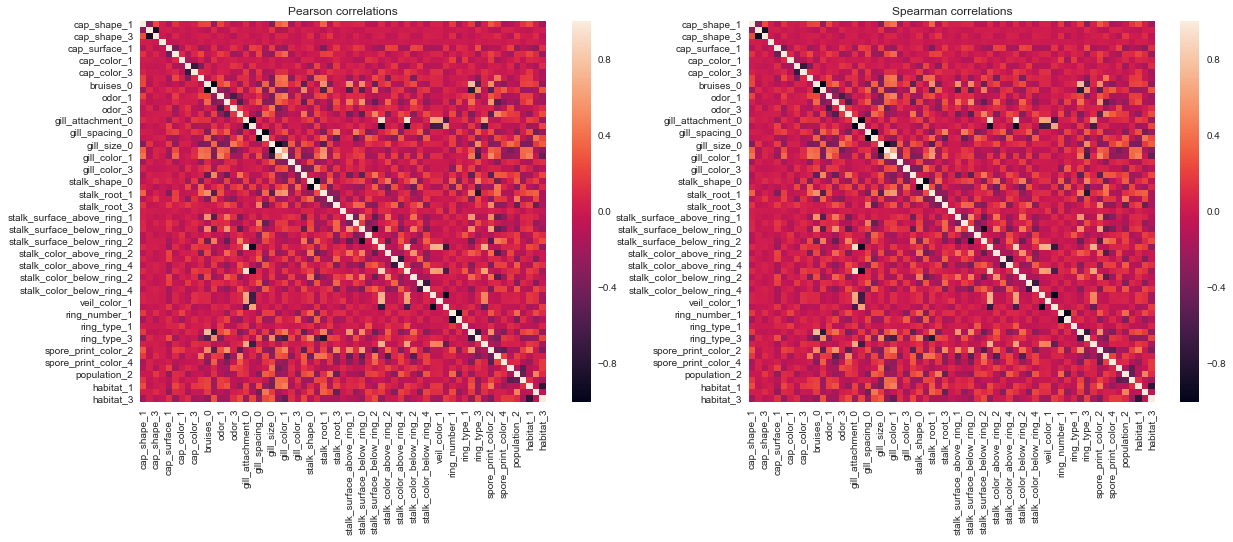

In [7]:
encoder = ce.BinaryEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

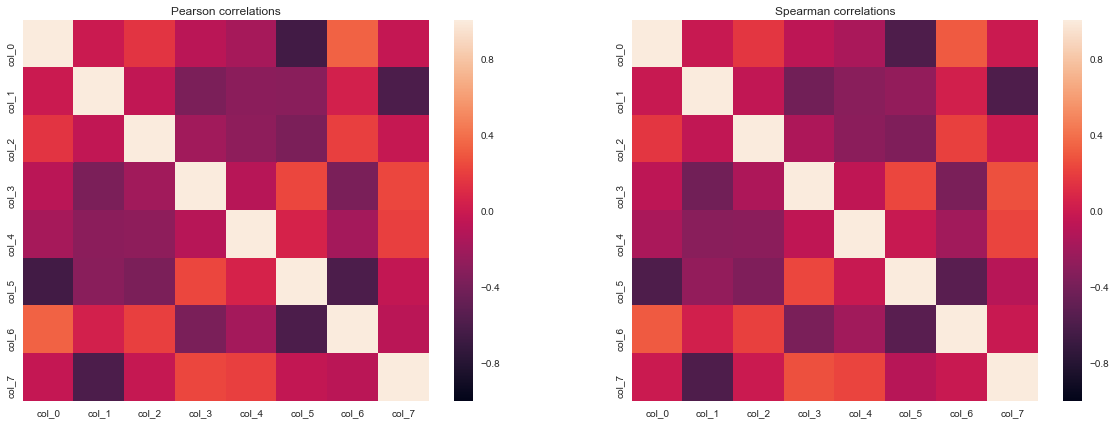

In [8]:
encoder = ce.HashingEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

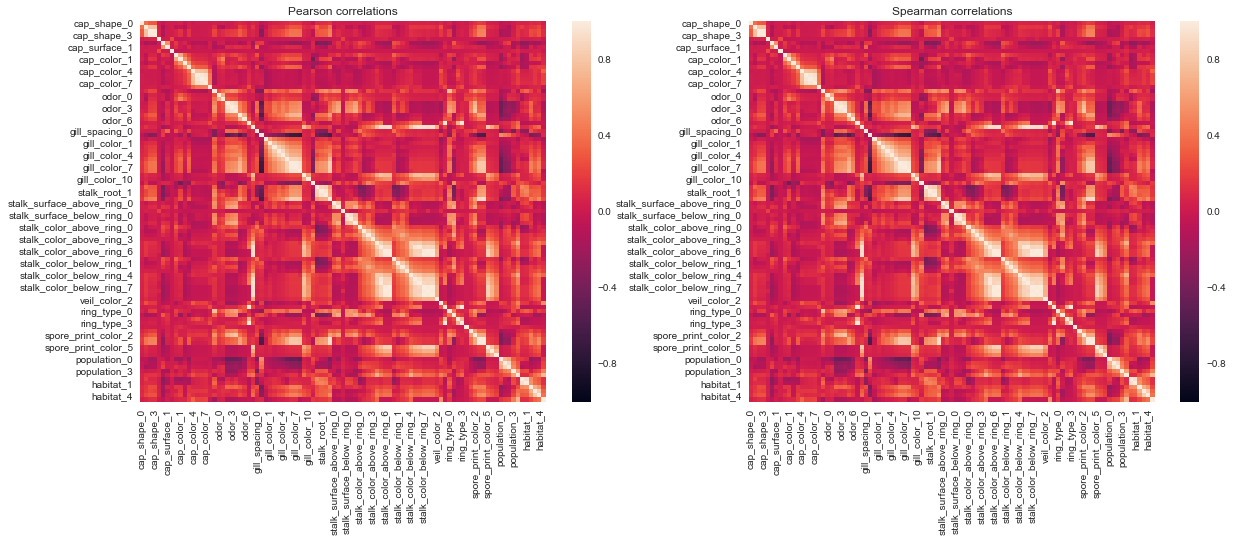

In [9]:
encoder = ce.BackwardDifferenceEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

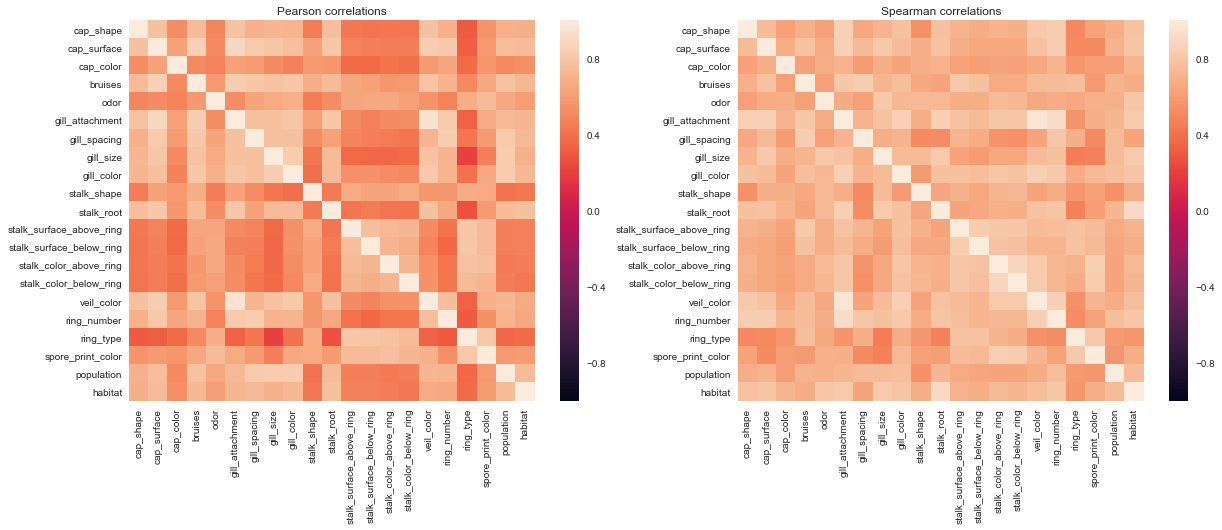

In [10]:
encoder = ce.CatBoostEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

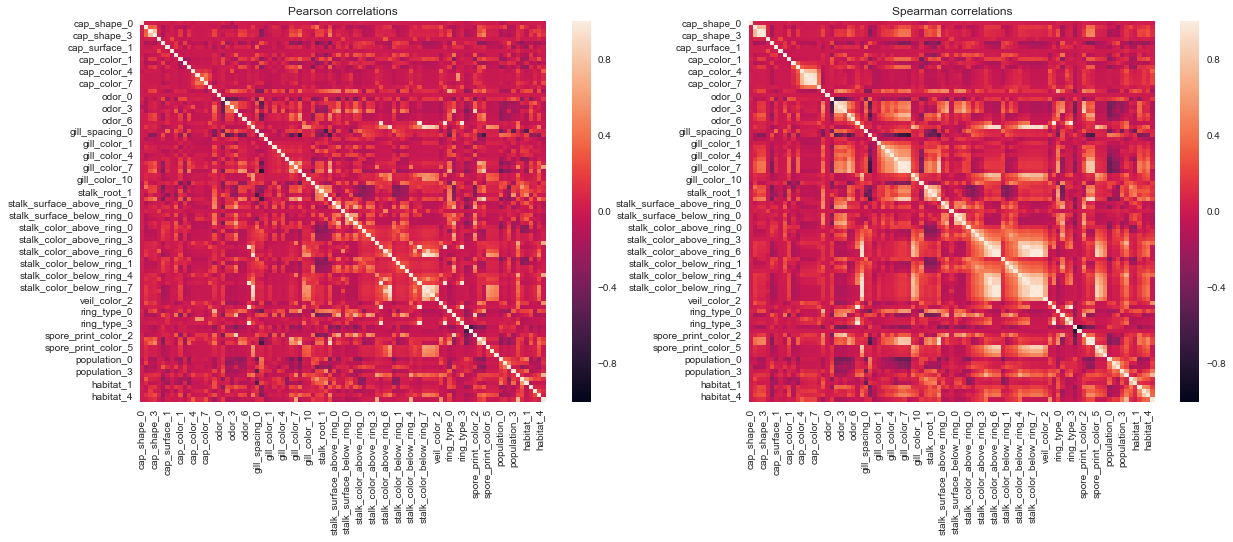

In [11]:
encoder = ce.HelmertEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

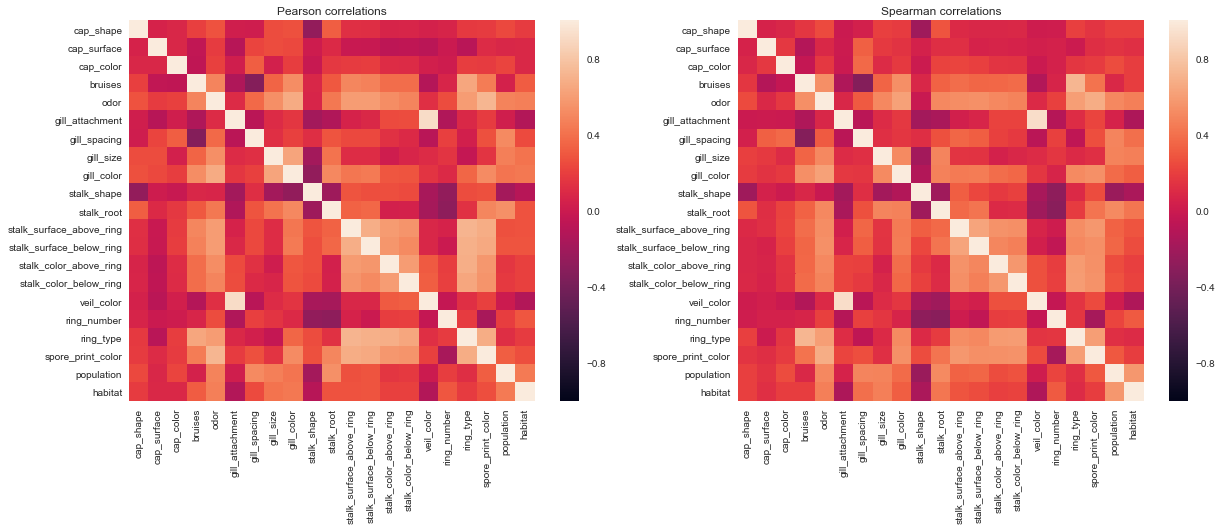

In [12]:
encoder = ce.JamesSteinEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

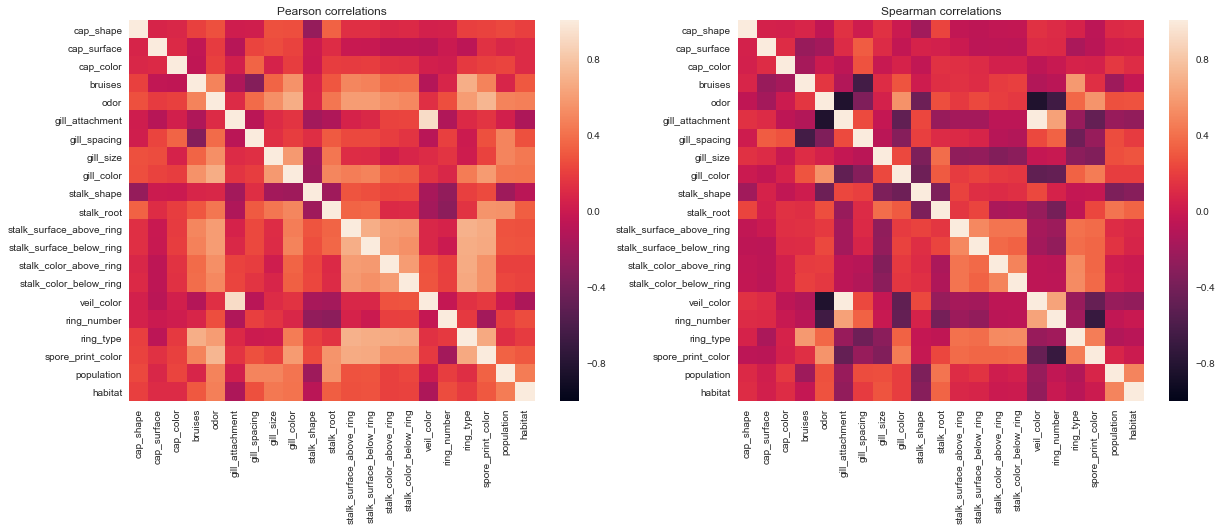

In [13]:
encoder = ce.LeaveOneOutEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

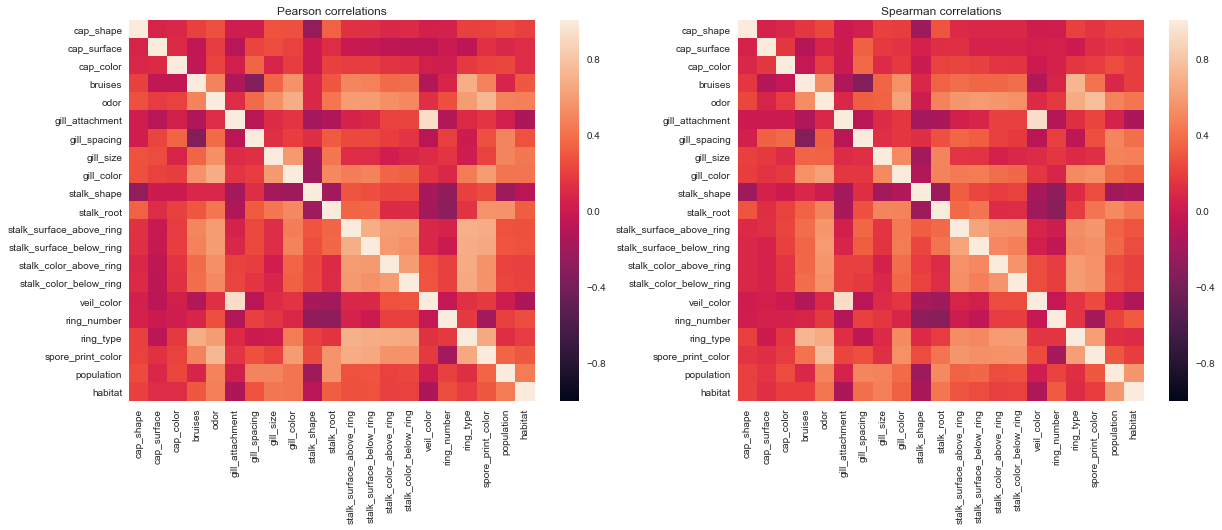

In [14]:
# For logistic predictions - target is classification (ex: yes/no)
encoder = ce.MEstimateEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

In [51]:
# For regression predictions - target is continuous number 
# encoder = ce.TargetEncoder
# viz_corr(mushrooms, mushrooms_y, encoder=encoder)

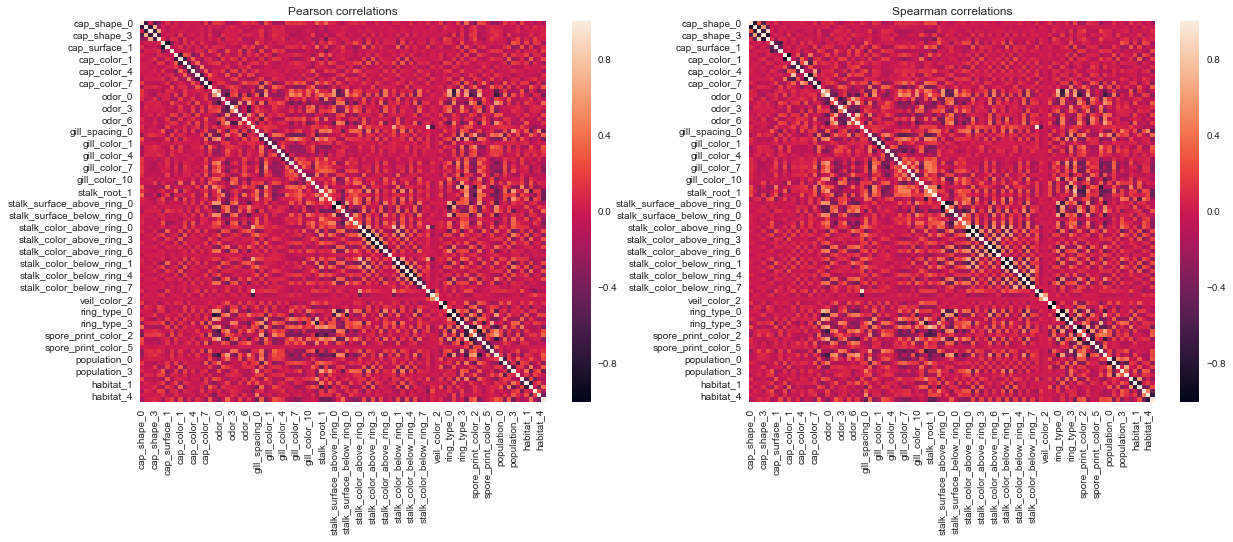

In [15]:
encoder = ce.PolynomialEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

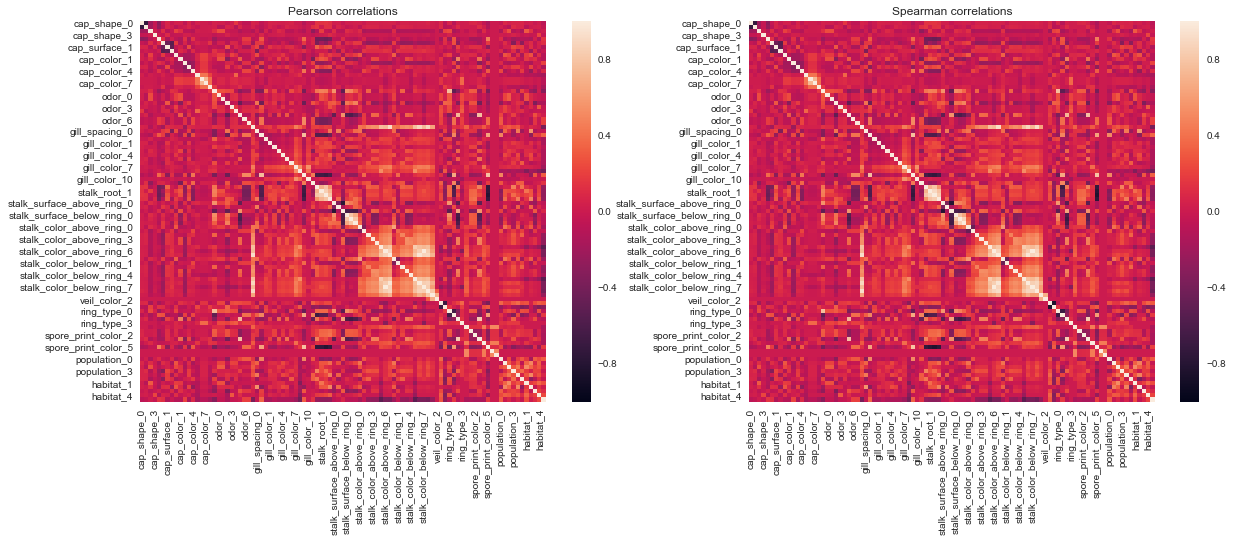

In [16]:
encoder = ce.SumEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

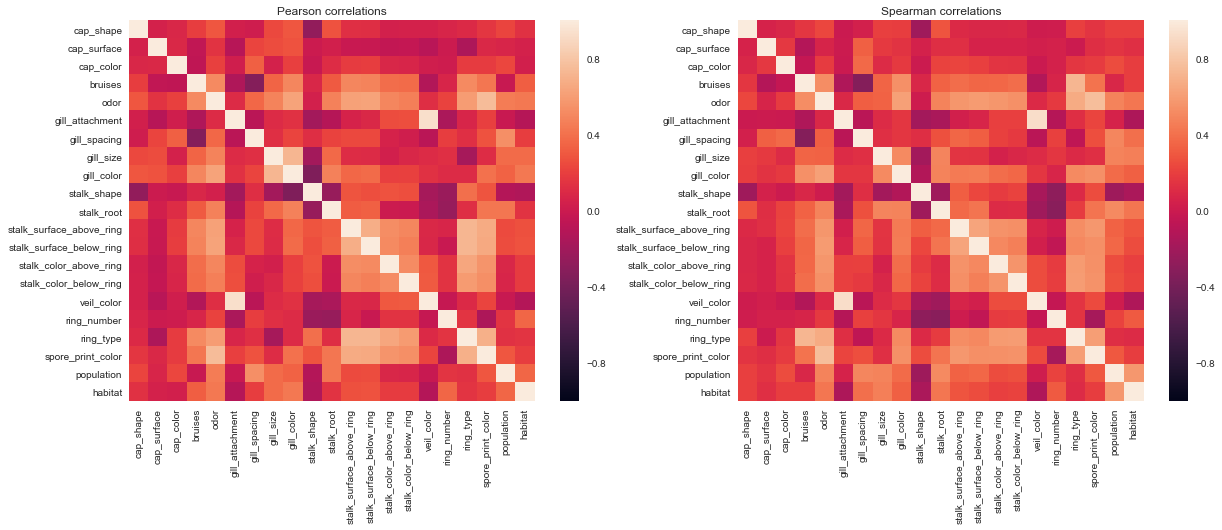

In [17]:
encoder = ce.WOEEncoder
viz_corr(mushrooms, mushrooms_y, encoder=encoder)

# Alternatives

Alternatives to correlation are Cramer's V and Theil's U.

Functions for Cramer's V, Theil's U, and conditional entropy came from [Shaked Zychlinski](https://github.com/shakedzy/dython/blob/master/dython/nominal.py).

## Cramer's V

In [18]:
import scipy.stats as ss

In [19]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [20]:
cramers = pd.DataFrame()
for i, a in enumerate(mushrooms.columns):
    cramers.loc[a, a] = 1.0
    for b in mushrooms.columns[:i]:
        val = round(cramers_v(mushrooms[a], mushrooms[b]), 2)
        cramers.loc[a,b] = val
        cramers.loc[b,a] = val
cramers.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
cap_shape,1.00,0.20,0.17,0.25,0.24,0.15,0.07,0.35,0.23,0.30,...,0.16,0.11,0.21,0.17,0.22,0.20,0.20,0.25,0.24,0.27
cap_surface,0.20,1.00,0.22,0.15,0.24,0.20,0.36,0.27,0.25,0.09,...,0.15,0.18,0.25,0.26,0.13,0.10,0.22,0.22,0.26,0.25
cap_color,0.17,0.22,1.00,0.23,0.33,0.25,0.41,0.48,0.28,0.58,...,0.25,0.31,0.27,0.27,0.15,0.32,0.54,0.28,0.30,0.33
bruises,0.25,0.15,0.23,1.00,0.64,0.13,0.33,0.35,0.63,0.08,...,0.56,0.55,0.47,0.48,0.13,0.08,0.77,0.57,0.31,0.53
odor,0.24,0.24,0.33,0.64,1.00,0.28,0.46,0.76,0.39,0.58,...,0.42,0.52,0.45,0.44,0.09,0.74,0.69,0.39,0.38,0.37


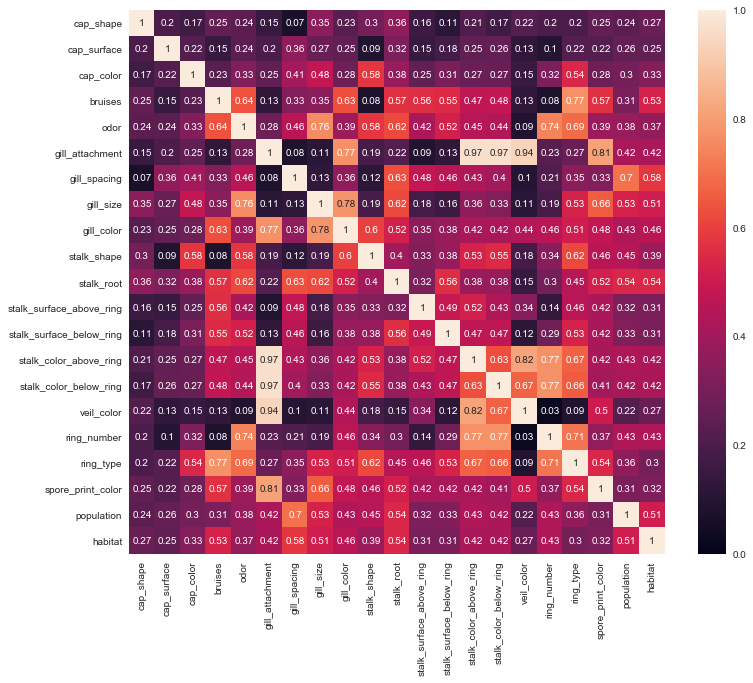

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(cramers, annot=True, vmin=0, vmax=1)

## Theil's U

In [26]:
import math
from collections import Counter

In [22]:
def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [37]:
theil = pd.DataFrame()
for i, a in enumerate(mushrooms.columns):
    theil.loc[a, a] = 1.0
    for b in mushrooms.columns:
        theil.loc[a,b] = round(theils_u(mushrooms[b], mushrooms[a]), 2)
        theil.loc[b,a] = round(theils_u(mushrooms[a], mushrooms[b]), 2)
theil.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
cap_shape,1.00,0.03,0.05,0.05,0.08,0.07,0.01,0.10,0.06,0.08,...,0.03,0.02,0.05,0.04,0.08,0.10,0.09,0.10,0.09,0.08
cap_surface,0.03,1.00,0.04,0.02,0.07,0.17,0.17,0.07,0.06,0.01,...,0.05,0.05,0.09,0.09,0.21,0.04,0.09,0.06,0.10,0.07
cap_color,0.07,0.07,1.00,0.05,0.25,0.26,0.20,0.21,0.18,0.29,...,0.13,0.15,0.20,0.19,0.24,0.19,0.25,0.21,0.17,0.21
bruises,0.03,0.01,0.02,1.00,0.16,0.11,0.14,0.11,0.12,0.00,...,0.24,0.20,0.11,0.11,0.09,0.01,0.33,0.12,0.04,0.11
odor,0.11,0.11,0.23,0.39,1.00,0.21,0.28,0.51,0.28,0.30,...,0.35,0.36,0.27,0.25,0.15,0.32,0.48,0.43,0.23,0.22


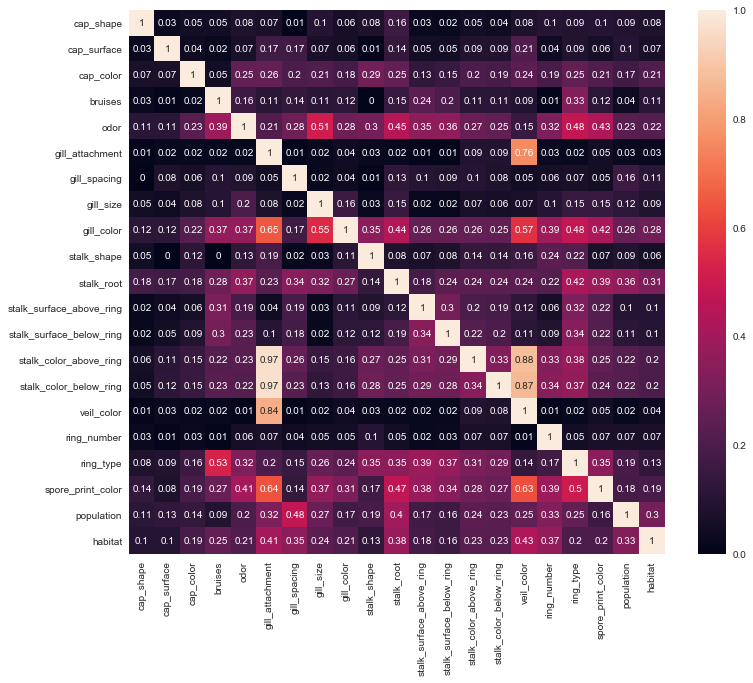

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(theil, annot=True, vmin=0, vmax=1)

In [39]:
pd.crosstab(mushrooms_raw['stalk_color_above_ring'], mushrooms_raw['gill_attachment'])

gill_attachment,ATTACHED,FREE
stalk_color_above_ring,,
BROWN,0,448
BUFF,0,432
CINNAMON,24,24
GRAY,0,576
ORANGE,192,0
PINK,0,1872
RED,0,96
WHITE,0,4744
YELLOW,0,8


### Cramer's V and Theil's U side by side

Text(0.5, 1, "Theil's U")

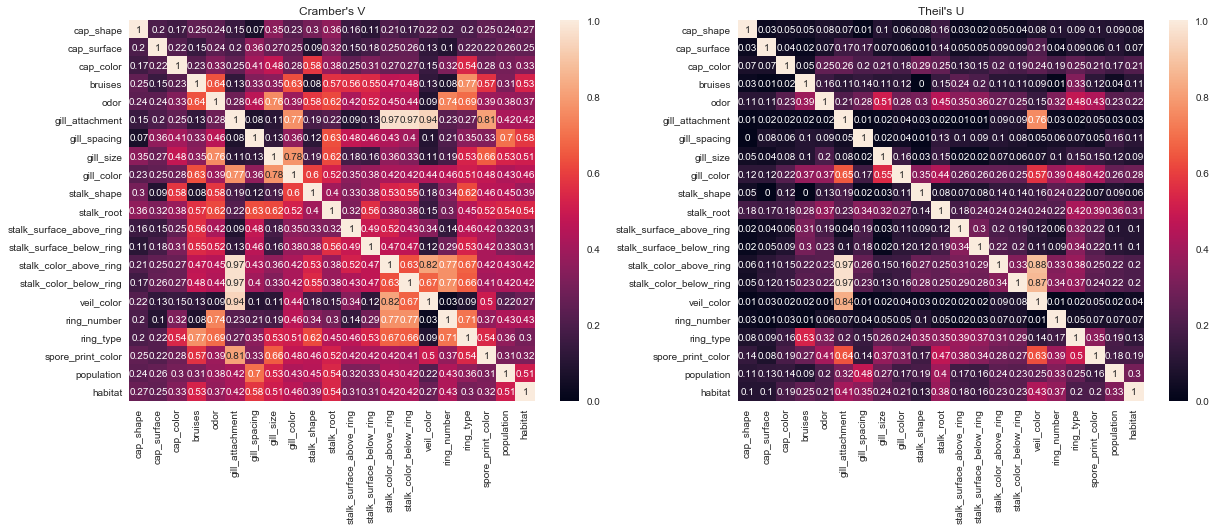

In [40]:
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
sns.heatmap(cramers, annot=True, vmin=0, vmax=1)
plt.title("Cramber's V")

plt.subplot(1, 2, 2)
sns.heatmap(theil, annot=True, vmin=0, vmax=1)
plt.title("Theil's U")